# TP1: Perceptron of F. Rosenblatt

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tp_perceptron_source import (rand_gauss, rand_bi_gauss, rand_checkers,
                                  rand_clown, plot_2d, gradient,
                                  plot_gradient, frontiere_new,
                                  hinge_loss, gr_hinge_loss,
                                  mse_loss, gr_mse_loss)
import seaborn as sns
from matplotlib import rc
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

### Settings

In [2]:
# Plot
plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)
# Seaborn
sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
sns.axes_style()
# Seed initialization
np.random.seed(seed=44)
# For saving files
saving_activated = True # False

### Data Generation: Examples
From rand_gauss

In [3]:
n = 10
mu = [1., 1.]
sigmas = [1., 1.]
rand_gauss(n, mu, sigmas)

array([[ 0.24938528,  2.31635732],
       [ 2.24614003, -0.60491574],
       [-0.46814368, -0.71507046],
       [ 2.85878369,  1.08758798],
       [ 0.9476778 ,  1.55547164],
       [ 0.03659631,  0.81967853],
       [-0.18340916,  1.60544592],
       [ 0.04834945,  1.36085606],
       [ 2.06061026,  0.88284782],
       [ 1.82566485, -0.20981355]])

From rand_bi_gauss

In [4]:
n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]
X1, y1 = rand_bi_gauss(n1, n2, mu1, mu2, sigmas1, sigmas2)

From rand_clown

In [5]:
n1 = 50
n2 = 50
sigmas1 = 1.
sigmas2 = 5.
X2, y2 = rand_clown(n1, n2, sigmas1, sigmas2)

From rand_checkers

In [6]:
n1 = 75
n2 = 75
sigma = 0.1
X3, y3 = rand_checkers(n1, n2, sigma)

### Displaying labeled data

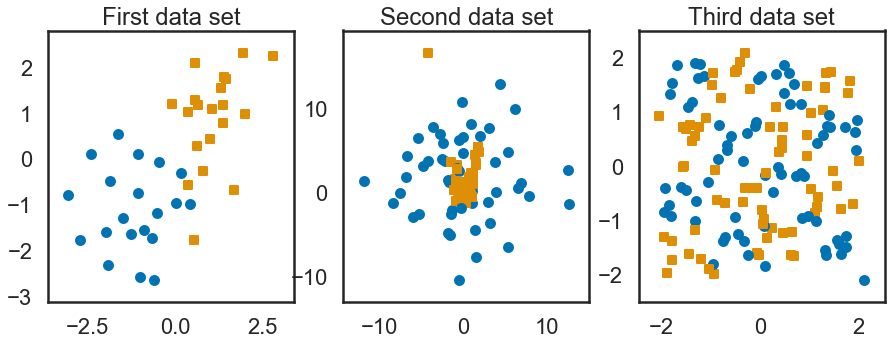

In [7]:
plt.close("all")
plt.figure(1, figsize=(15, 5))
plt.subplot(131)
plt.title('First data set')
plot_2d(X1, y1)
plt.subplot(132)
plt.title('Second data set')
plot_2d(X2, y2)
plt.subplot(133)
plt.title('Third data set')
plot_2d(X3, y3)
plt.show()

## Perceptron example

### MSE Loss

In [9]:
epsilon = 0.001
niter = 10
w_ini = np.random.randn(X1.shape[1] + 1)
lfun = mse_loss
gr_lfun = gr_mse_loss

Gradient descent manually coded

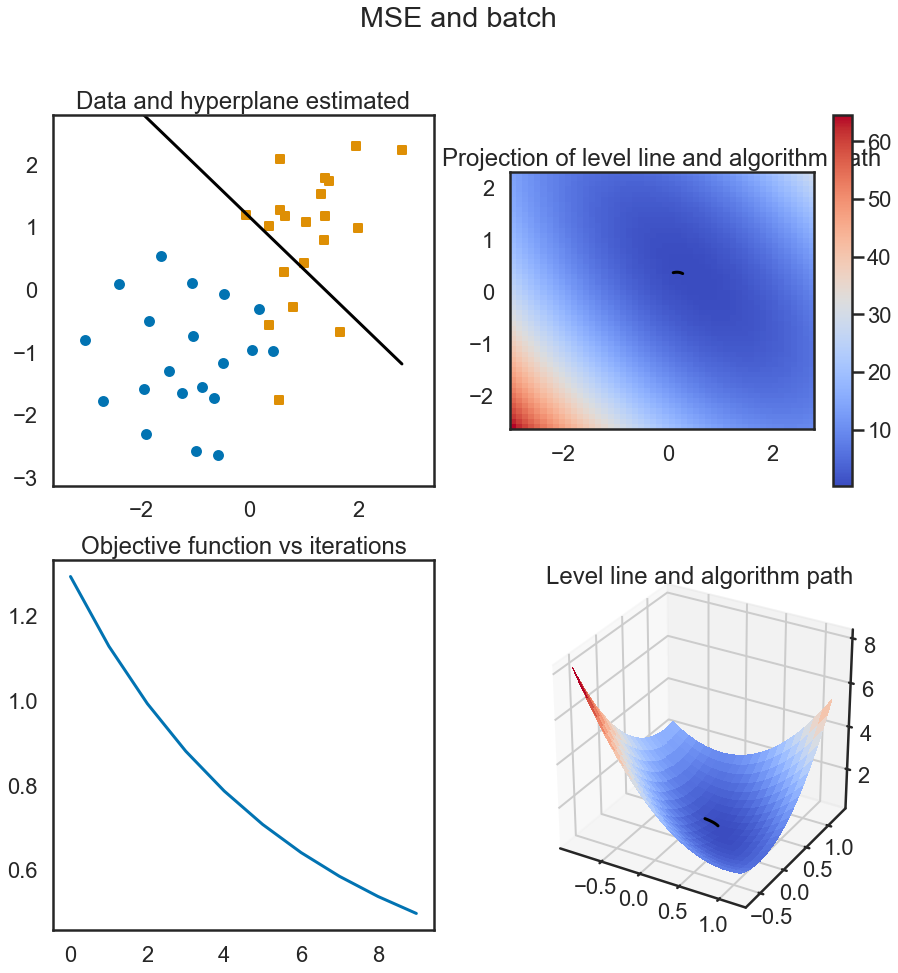

In [10]:
plt.figure(7, figsize=(15, 15))
wh, costh = gradient(X1, y1, epsilon, niter, w_ini, lfun, gr_lfun,
                     stochastic=False)
plot_gradient(X1, y1, wh, costh, lfun)
plt.suptitle('MSE and batch')
plt.show()

Stochastic gradient descent (SGD) manually coded

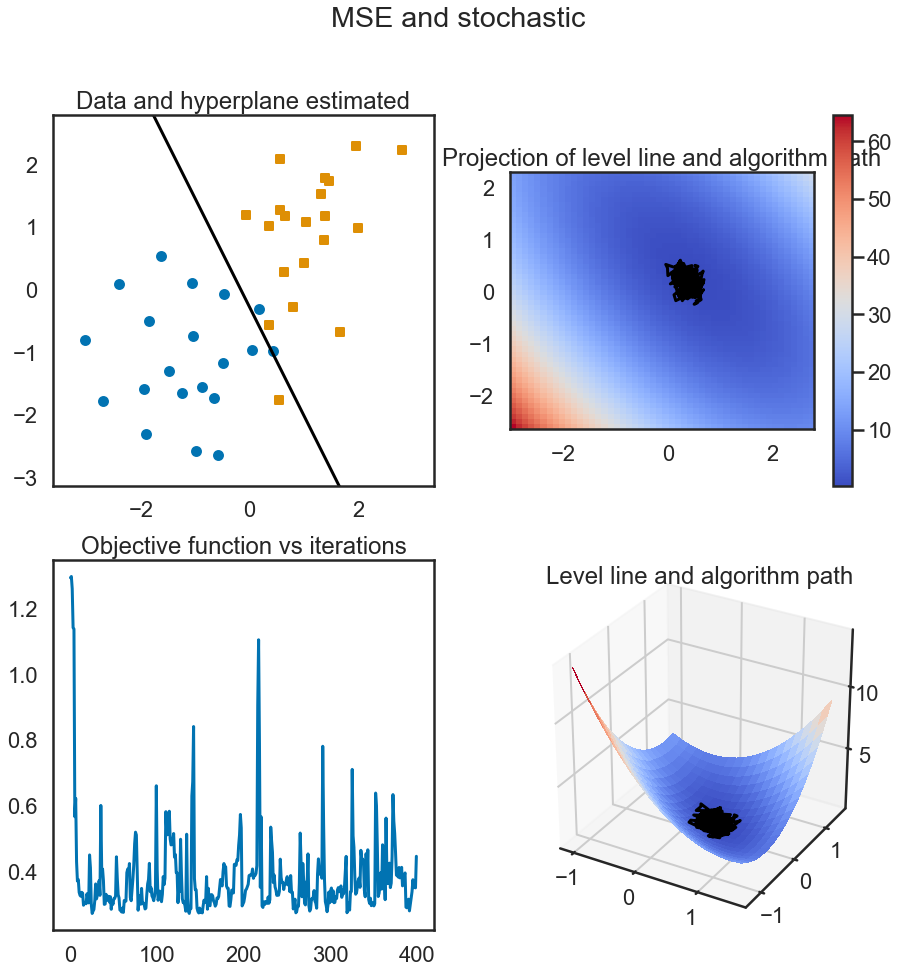

In [10]:
epsilon = 0.05
plt.figure(8, figsize=(15, 15))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, epsilon, niter * len(y1), w_ini, lfun,
                             gr_lfun, stochastic=True)
plot_gradient(X1, y1, wh_sto, costh_sto, lfun)
plt.show()

Sklearn SGD

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

(40000, 2)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

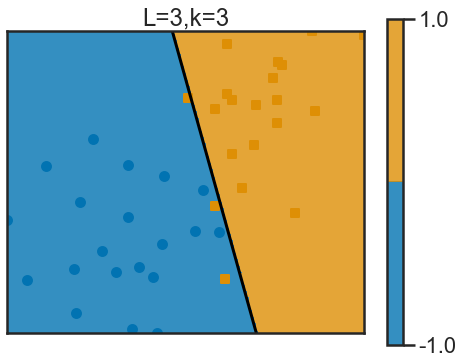

In [11]:
clf = linear_model.SGDClassifier(max_iter = 15, tol = None)
clf.fit(X1, y1)
plt.figure(88)
wsgd = [clf.intercept_[0], clf.coef_[0, 0], clf.coef_[0, 1]]
frontiere_new(clf, X1, y1, wsgd, step=200, alpha_choice=1)
plt.show()

### Hinge Loss

Gradient descent manually coded

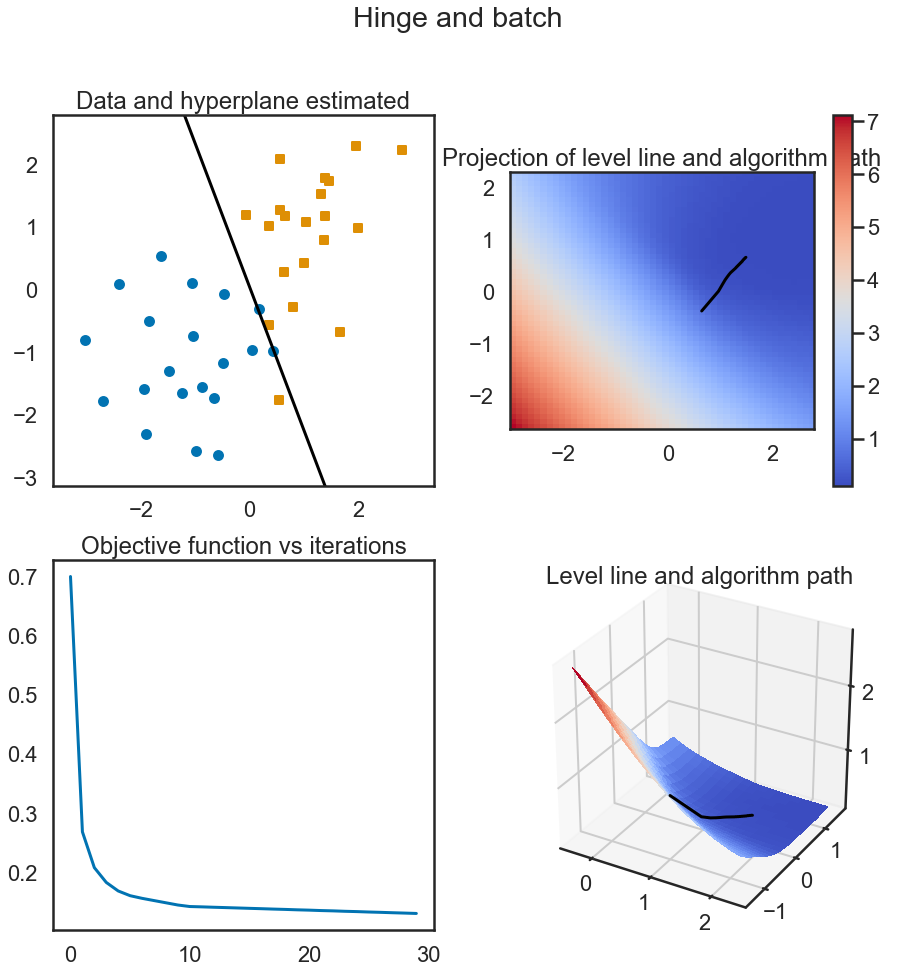

In [12]:
epsilon = 0.01
niter = 30
std_ini = 1.
w_ini = std_ini * np.random.randn(X1.shape[1] + 1)

lfun = hinge_loss
gr_lfun = gr_hinge_loss
wh, costh = gradient(X1, y1, epsilon, niter, w_ini, lfun,
                     gr_lfun, stochastic=False)

plt.figure(9, figsize=(15, 15))
plt.suptitle('Hinge and batch')
plot_gradient(X1, y1, wh, costh, lfun)
plt.show()

SGD manually coded

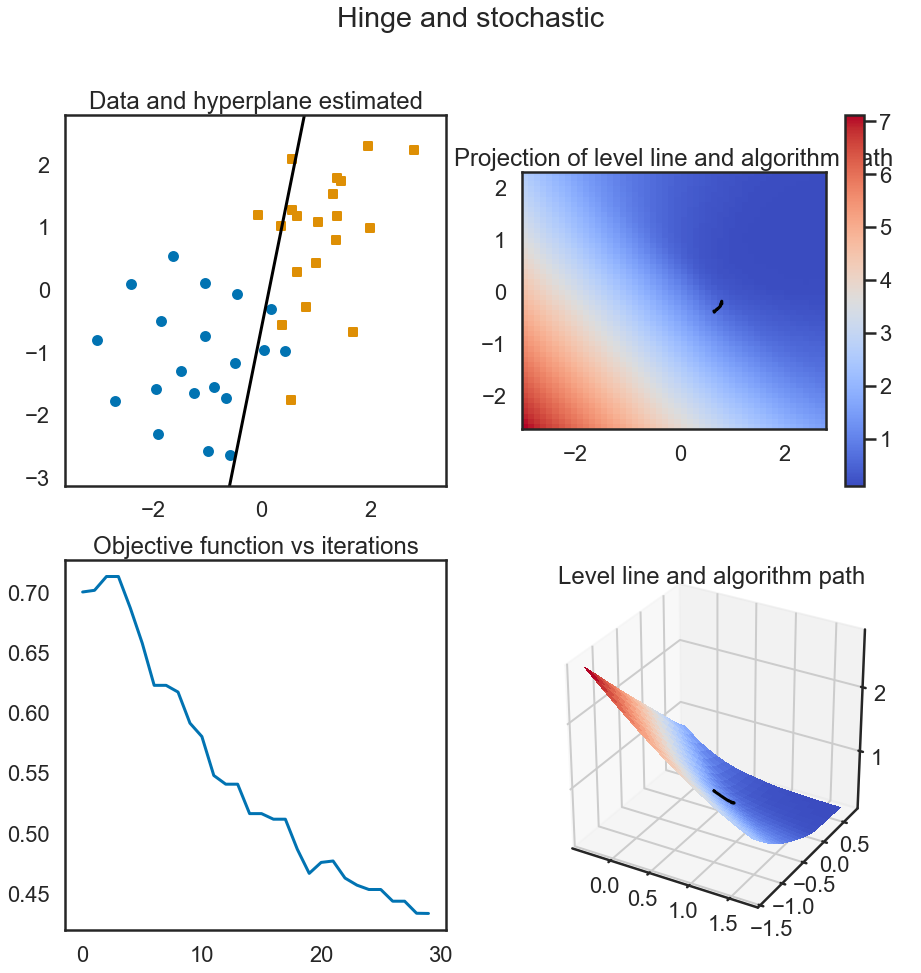

In [13]:
plt.figure(10, figsize=(15, 15))
plt.suptitle('Hinge and stochastic')
wh_sto, costh_sto = gradient(X1, y1, epsilon, niter, w_ini, lfun,
                             gr_lfun, stochastic=True)
plot_gradient(X1, y1, wh_sto, costh_sto, lfun)
plt.show()

Create a figure with all the boundary displayed with a brighter display for the newest one using alpha_choice in plot_2d

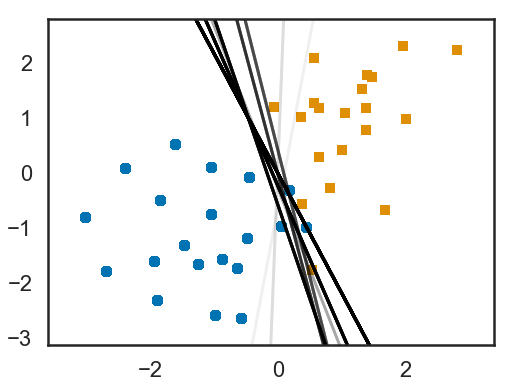

In [14]:
epsilon = 0.1
niter = 50
plt.figure(11)
wh_sto, costh_sto = gradient(X1, y1, epsilon, niter, w_ini, lfun,
                             gr_lfun, stochastic=True)
indexess = np.arange(0., 1., 1. / float(niter))
for i in range(niter):
    plot_2d(X1, y1, wh_sto[i, :], alpha_choice=indexess[i])

## Perceptron for larger dimensions

(1000000, 2)


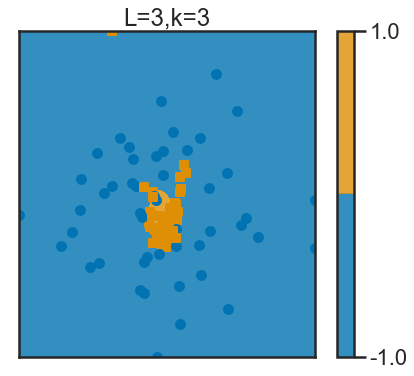

In [15]:
epsilon = 0.01
niter = 50

poly_quad = PolynomialFeatures(degree=2)
clf = linear_model.SGDClassifier(max_iter = 15, tol = None)

my_pipeline = Pipeline([('poly_quad', poly_quad), ('sgd', clf)])
my_pipeline.fit(X2, y2)

plt.figure(11)
frontiere_new(my_pipeline, X2, y2, step=1000)
plt.show()